# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df_viz = pd.read_csv("Telco-Customer-Churn.csv")

# Data exploration

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isna().sum().sum()
# No NAN !!!!!!!

0

In [8]:
# Churn ratio
(df['Churn'].value_counts()/len(df))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## Correlations heatmap

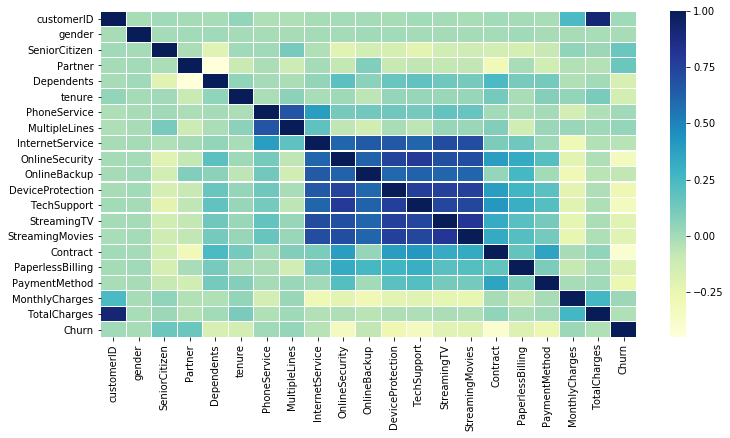

In [856]:
plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

## Features

In [897]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [854]:
# tenure : the number of months the 
# customer has stayed
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [855]:
# MonthlyCharges : the amount charged to 
# the customer monthly
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

### Continuous columns

In [857]:
df.select_dtypes(["float64", "int64"]).head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [858]:
cont_col = df.select_dtypes(["float64", "int64"]).drop("SeniorCitizen", axis=1).columns

cont_col

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [859]:
type(df["TotalCharges"][0])

str

In [860]:
def float_it_up(x):
    return float(x)

In [861]:
df["TotalCharges"].apply(lambda x: float_it_up(x))

ValueError: could not convert string to float: 

Y en a une qui déconne; mais **laquelle ?**

In [862]:
lst_types = []
for n in range(len(df["TotalCharges"])):
    if type(df["TotalCharges"][n]) != str:
        lst_types.append(type(df["TotalCharges"][n]))
    
lst_types

[]

In [863]:
for n in range(len(df["TotalCharges"])):
    print(n)
    float(df["TotalCharges"][n])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ValueError: could not convert string to float: 

La 488 !

In [864]:
df["TotalCharges"][488]

' '

In [865]:
len(df[df["TotalCharges"] == " "].index)

11

Let's drop 'em, there's only 11

In [866]:
df = df.drop(index=df[df["TotalCharges"] == " "].index)
df_viz = df_viz.drop(index=df_viz[df_viz["TotalCharges"] == " "].index)

In [842]:
df.shape

(7032, 21)

In [867]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: float_it_up(x))
df_viz["TotalCharges"] = df_viz["TotalCharges"].apply(lambda x: float_it_up(x))

In [869]:
df["TotalCharges"].dtype
# We good !

dtype('float64')

In [870]:
cont_col = df.select_dtypes(["float64", "int64"]).drop("SeniorCitizen", axis=1).columns

cont_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

#### DataViz Continuous columns

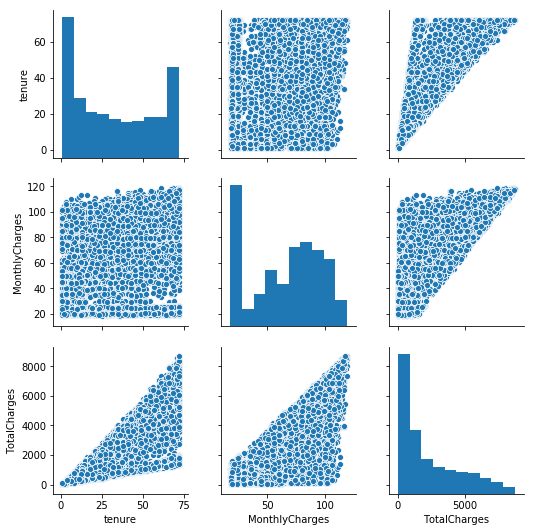

In [871]:
sns.pairplot(df[cont_col])

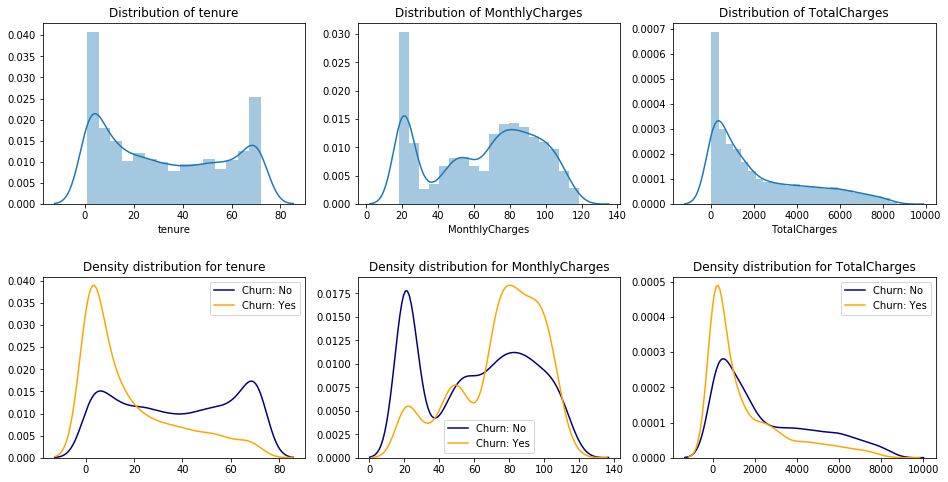

In [899]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 3, 1)
sns.distplot(df["tenure"])
plt.title("Distribution of tenure")

plt.subplot(2, 3, 2)
sns.distplot(df["MonthlyCharges"])
plt.title("Distribution of MonthlyCharges")

plt.subplot(2, 3, 3)
sns.distplot(df["TotalCharges"])
plt.title("Distribution of TotalCharges")

plt.subplot(2, 3, 4)    
plt.title("Density distribution for tenure")
ax0 = sns.kdeplot(df_viz[df_viz['Churn'] == "No"]["tenure"].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(df_viz[df_viz['Churn'] == "Yes"]["tenure"].dropna(), color= 'orange', label= 'Churn: Yes')

plt.subplot(2, 3, 5)    
plt.title("Density distribution for MonthlyCharges")
ax0 = sns.kdeplot(df_viz[df_viz['Churn'] == "No"]["MonthlyCharges"].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(df_viz[df_viz['Churn'] == "Yes"]["MonthlyCharges"].dropna(), color= 'orange', label= 'Churn: Yes')

plt.subplot(2, 3, 6)    
plt.title("Density distribution for TotalCharges")
ax0 = sns.kdeplot(df_viz[df_viz['Churn'] == "No"]["TotalCharges"].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(df_viz[df_viz['Churn'] == "Yes"]["TotalCharges"].dropna(), color= 'orange', label= 'Churn: Yes')


We can conclude that:

- Recent clients are more likely to churn
- Clients with higher MonthlyCharges are also more likely to churn

### Categorical columns

In [887]:
cat_col = list(df.select_dtypes(["object"]).columns)
cat_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [888]:
cat_col.append(df["SeniorCitizen"].name)
cat_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [566]:
df[cat_col].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [683]:
for col in cat_col:
    print(col, col_dict[col])

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2
SeniorCitizen 2


#### DataViz categorical columns

In [895]:
cat_col_ = cat_col.copy()
cat_col_.remove('customerID')
cat_col_.remove('Churn')

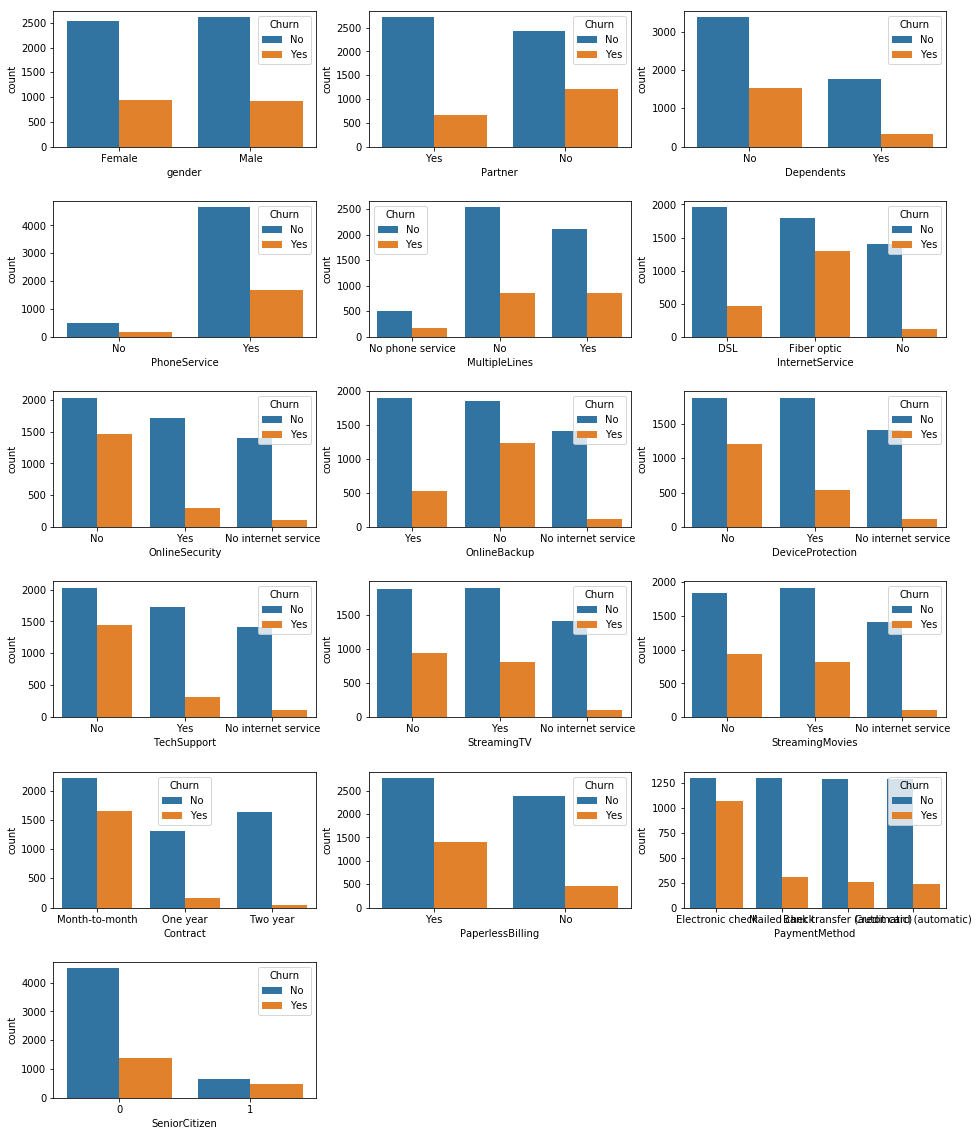

In [896]:
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(len(cat_col_)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[cat_col_[i]], hue=df['Churn'])
    #plt.title(cat_features[i])

plt.show()

### Cat variables encoding

In [686]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    if df[col].nunique() == 2:
        le.fit(df[col])
        df[col] = le.transform(df[col])
        

In [688]:
df.head(n=2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0


In [689]:
df_dummies = pd.get_dummies(df.iloc[:, 1:])

In [690]:
df = pd.concat([df["customerID"], df_dummies], axis=1)

In [692]:
df.head(n=2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1


My dataframe is now all numerical values !

In [693]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [694]:
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

## Scaling

In [695]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X, y)
X_scaled = sc.transform(X)

In [696]:
X_scaled.shape

(7032, 40)

## Splitting X, y

In [697]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

## Predict me up !

#### Random Forest

##### No PCA

In [698]:
from sklearn.ensemble import RandomForestClassifier
    
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [699]:
y_pred_rf = rf.predict(X_test)

In [700]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_rf)

0.5468509984639017

In [701]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.48      0.55       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



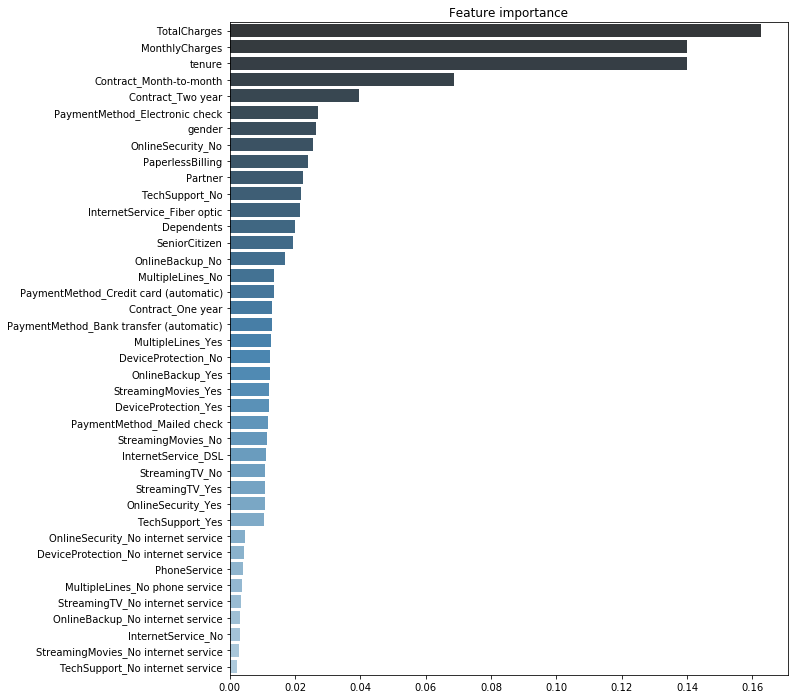

In [702]:
imp = pd.Series(data=rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

##### With PCA

In [703]:
X_train_centered = X_train - X_train.mean()
X_test_centered = X_test - X_test.mean()

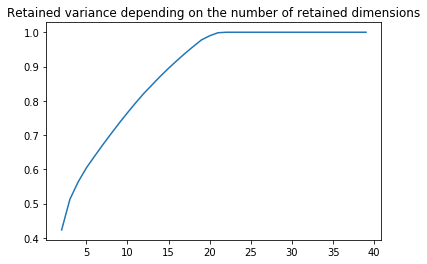

In [704]:
lst = []

for n in range(2, 40):
    
    pca = PCA(n_components=n)
    pca.fit(X_train_centered)
    
    lst.append(pca.explained_variance_ratio_.sum())
    
plt.figure()

plt.plot(range(2, 40), lst)
plt.title("Retained variance depending on the number of retained dimensions")

plt.show()


In [705]:
# Let's try a pca with n_components = 10

pca_ = PCA(n_components=20)
X_train_pca = pca_.fit(X_train_centered).transform(X_train_centered)
X_test_pca = pca_.fit(X_test_centered).transform(X_test_centered)

rf_pca = RandomForestClassifier(n_estimators=200, criterion='entropy')

rf_pca.fit(X_train_pca, y_train)
y_pred_rfc_pca = rf_pca.predict(X_test_pca)

f1_score(y_test, y_pred_rfc_pca)

0.4227941176470588

#### Adaboost

In [706]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

f1_score(y_test, y_pred_ada)

0.6080476900149031

In [707]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1038
           1       0.68      0.55      0.61       369

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



#### SVM

In [708]:
from sklearn.svm import SVC

svc = SVC(C=1, class_weight={0:0.26, 1:0.74})
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

f1_score(y_test, y_pred_svc)

0.6155440414507772

In [709]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.80      0.62       369

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



#### Logistic Regression

In [710]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10, class_weight={0:0.26, 1:0.74})
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

f1_score(y_test, y_pred_lr)

0.6222684703433923

In [711]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1038
           1       0.51      0.81      0.62       369

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.76      1407



#### GBC

In [712]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, 
                                 loss='exponential', max_depth=5)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

f1_score(y_test, y_pred_gbc)

0.5907046476761619

In [713]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.66      0.53      0.59       369

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



#### XGBoost

In [760]:
# scale_pos_weight = (nb of 0 - nb of 1)/nb of 1
((len(y)-sum(y))-sum(y))/sum(y)

1.7624398073836276

In [765]:
import xgboost as xgb

xg = xgb.XGBClassifier(max_depth=1, scale_pos_weight=1.76, learning_rate=0.062)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

f1_score(y_test, y_pred_xg)

0.6508313539192399

In [753]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1038
           1       0.58      0.74      0.65       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.78      0.75      1407
weighted avg       0.81      0.79      0.80      1407



#### LightGBM

In [784]:
import lightgbm as lgb

lg = lgb.LGBMClassifier(max_depth=2, scale_pos_weight=1.76)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

f1_score(y_test, y_pred_lg)

0.6414634146341464

In [785]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1038
           1       0.58      0.71      0.64       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.77      0.75      1407
weighted avg       0.81      0.79      0.80      1407



# Conclusion

Best algorithm = XGBoost

Best f1_score = 0.6508